In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv(r'C:\Users\User-1\Downloads\Amazon ML Challenge\train.csv')
#test = pd.read_csv(r'C:\Users\User-1\Downloads\Amazon ML Challenge\train.csv')

In [3]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [9]:
np.shape(train)

(2249698, 6)

In [8]:
train['PRODUCT_ID'].nunique()

2249698

In [10]:
train['PRODUCT_TYPE_ID'].nunique()

12907

In [11]:
train.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [12]:
train.iloc[0][2]

'[LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes inbuilt tieback to hold the curtain | Completely finished and ready to hang on walls & windows,MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS,BLACKOUT CURTAIN: 100% opaque & heavy premium cotton canvas fabric | Tight knitted, long life & durable fabric | Printing only on front side with a plain colour back side,MADE TO PERFECTION: Large eyelets at the top to put hanging hooks | Perfectly tailored seams for durability | Refined stitching with a matching thread color,QUALITY ASSURED: Gentle wash with similar colors in cold water | Avoid direct sunlight to prevent fading | Dispatched after MULTIPLE QUALITY CHECKS]'

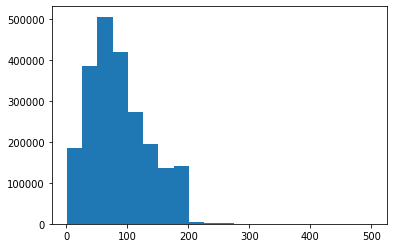

In [20]:
title_tweet_len = train['TITLE'].str.len()

plt.hist(title_tweet_len,bins=20,label='train')


plt.show()

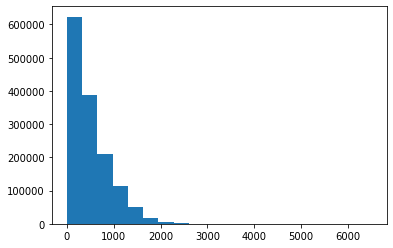

In [21]:
bullet_tweet_len = train['BULLET_POINTS'].str.len()

plt.hist(bullet_tweet_len,bins=20,label='train')


plt.show()

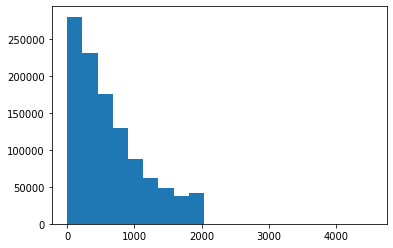

In [23]:
desc_tweet_len = train['DESCRIPTION'].str.len()

plt.hist(desc_tweet_len,bins=20,label='train')


plt.show()

In [25]:
print(title_tweet_len.mean())
print(bullet_tweet_len.mean())
print(desc_tweet_len.mean())

86.77981104918642
499.9971196614965
629.7622649835167


In [26]:
train['PRODUCT_LENGTH'].describe()

count    2.249698e+06
mean     4.071839e+03
std      1.351685e+06
min      1.000000e+00
25%      5.118110e+02
50%      6.630000e+02
75%      1.062992e+03
max      1.885801e+09
Name: PRODUCT_LENGTH, dtype: float64

In [28]:
df1 = train[train['PRODUCT_LENGTH']==1]

In [30]:
df1.iloc[0][2]

'[CREATE CUSTOM HEADBOARD ARRANGEMENTS – Includes four panels that can be arranged horizontally or vertically on your wall. Mix and match multiple sets to create the perfect custom look. Pick a single shade that speaks to you for a classic, monochrome look, or use creative color combinations to express your unique style,SOFT AND PADDED - The furniture-grade foam core keeps kids safe, while also doubling as an acoustic panel which dampens sounds and reduces ambient noise. Each piece is covered with a plush microsuede fabric that is lavishly soft, durable, lightly textured, and stain-guarded.,PROTECTIVE FOR KIDS & EDUCATIONAL ENVIRONMENTS – Panels make excellent accents for educational and play areas while adding safety. Featuring colors that kids and adults alike will love. NFPA-260 certified. Certipur-US approved.,EASY TO INSTALL & REMOVE - Panels come with screws and wood boards, affixed with a heavy-duty hook-and-loop style strip. Simply screw boards into wall, and place panels on lo

In [54]:
train = pd.read_csv('amazon_train.csv')
test = pd.read_csv('amazon_test.csv')


In [55]:
train.isnull().sum()

Unnamed: 0           0
TITLE                0
BULLET_POINTS        0
PRODUCT_LENGTH       0
x                 3185
dtype: int64

In [56]:
train['x'].fillna(train['TITLE'] , inplace = True)
test['x'].fillna(test['TITLE'] , inplace = True)

In [74]:
train = train[~(train['PRODUCT_LENGTH'] > 2000)]

2500 , 1500 , 1100 , 950 , 800

In [75]:
np.shape(train)

(2060701, 5)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 15000)
df_train = tfidf_vectorizer.fit_transform(train['x'])
df_test = tfidf_vectorizer.transform(test['x'])

In [84]:
y_train = train[['PRODUCT_LENGTH']]

## 1.

In [50]:
from sklearn.svm import LinearSVR
svr = LinearSVR(max_iter = 50000)

In [51]:
svr.fit(df_train , y_train)
pred = svr.predict(df_test)
predicted = svr.predict(df_train)
pred = pd.DataFrame(pred)

C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
from sklearn import metrics
(1-metrics.mean_absolute_percentage_error(y_train,predicted))

-1.0577509911945002

In [53]:
pred.to_csv(r'C:\Users\User-1\Downloads\Amazon ML Challenge\submit.csv')

## 2.

In [94]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the model
model = RandomForestRegressor(n_estimators=100, max_depth=3, warm_start=True)


# Define the batch size
batch_size = 20000

# Loop over the dataset in batches
for i in range(0, len(y_train), batch_size):
    X_batch = df_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    
    # Train on the batch
    model.fit(X_batch, y_batch)


<ipython-input-94-a25e04da29a5>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_batch, y_batch)
<ipython-input-94-a25e04da29a5>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_batch, y_batch)
C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-94-a25e04da29a5>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_batch, y_batch)
C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\ensemble\_forest.py:369: UserW

In [95]:
pred1 = model.predict(df_test)
pred1 = pd.DataFrame(pred1)

In [96]:
pred1.to_csv(r'C:\Users\User-1\Downloads\Amazon ML Challenge\submit1.csv')

In [91]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)


# Define the batch size
batch_size = 20000
li = []
# Loop over the dataset in batches
for i in range(0, len(y_train), batch_size):
    X_batch = df_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    
    # Train on the batch
    model.fit(X_batch, y_batch)
    li.append(model)
    
y_pred = np.mean([gbr.predict(df_test) for gbr in li], axis=0)

C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User-1\Anaconda3\envs\tfod\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [92]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv(r'C:\Users\User-1\Downloads\Amazon ML Challenge\submit1.csv')

## Glove